In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog


In [32]:
data = pd.read_csv("C:/Users/ASUS/ATS/UTS VISION/emnist-letters-train.csv", header=None)

balanced_data = pd.DataFrame()
for label in range(1, 27):
    subset = data[data[0] == label].sample(n=100, random_state=42)
    balanced_data = pd.concat([balanced_data, subset], axis=0)
balanced_data = shuffle(balanced_data, random_state=42).reset_index(drop=True)


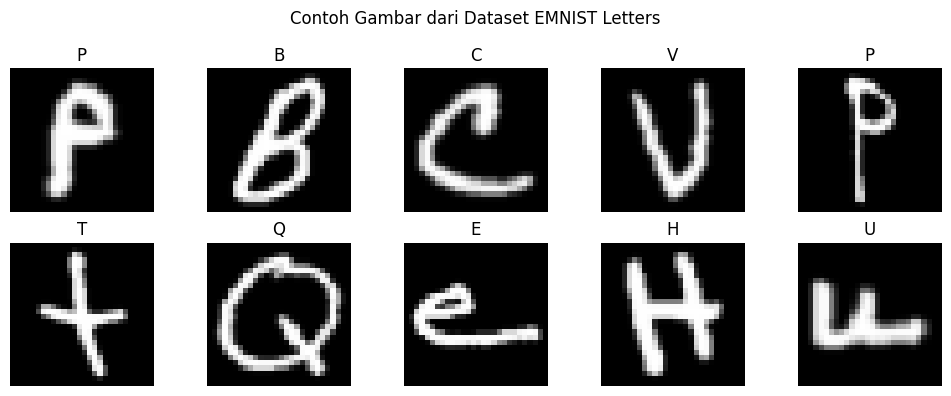

In [33]:
plt.figure(figsize=(10, 4))
for i in range(10):
    label = chr(int(balanced_data.iloc[i, 0]) + 64)
    img = balanced_data.iloc[i, 1:].values.reshape(28, 28).T
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.suptitle("Contoh Gambar dari Dataset EMNIST Letters")
plt.tight_layout()
plt.show()


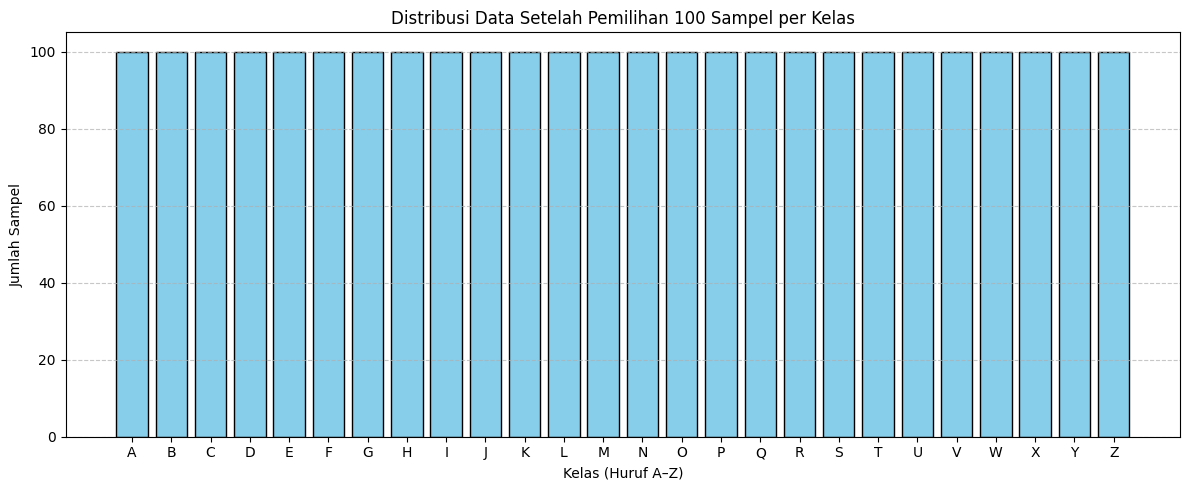

In [34]:
labels, counts = np.unique(balanced_data.iloc[:, 0], return_counts=True)
labels_as_letters = [chr(i + 64) for i in labels]
plt.figure(figsize=(12, 5))
plt.bar(labels_as_letters, counts, color='skyblue', edgecolor='black')
plt.title("Distribusi Data Setelah Pemilihan 100 Sampel per Kelas")
plt.xlabel("Kelas (Huruf A–Z)")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
train_images = balanced_data.iloc[:, 1:].values
train_labels = balanced_data.iloc[:, 0].values


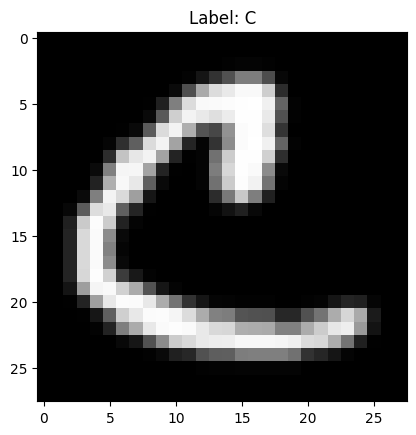

In [36]:
plt.imshow(train_images[2].reshape(28, 28).T, cmap='gray')
plt.title(f"Label: {chr(train_labels[2] + 64)}")
plt.show()


In [37]:
hog_params = {'orientations': 9, 'pixels_per_cell': (8, 8), 'cells_per_block': (2, 2), 'block_norm': 'L2-Hys'}
def extract_hog_features(images):
    features = []
    for img in images:
        reshaped = img.reshape(28, 28).T
        hog_feat = hog(reshaped, **hog_params)
        features.append(hog_feat)
    return np.array(features)
X_hog = extract_hog_features(train_images)
y = train_labels


In [38]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_hog, y)
best_model = grid.best_estimator_
print("Parameter terbaik:", grid.best_params_)
print("Skor cross-validation terbaik:", grid.best_score_)


Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Skor cross-validation terbaik: 0.7830773028316521


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, stratify=y, random_state=42)

# Prediksi pada training data
y_train_pred = best_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        80
           3       1.00      0.99      0.99        80
           4       1.00      1.00      1.00        80
           5       0.99      1.00      0.99        80
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        80
           9       1.00      0.94      0.97        80
          10       1.00      1.00      1.00        80
          11       1.00      1.00      1.00        80
          12       0.94      1.00      0.97        80
          13       1.00      1.00      1.00        80
          14       1.00      1.00      1.00        80
          15       1.00      1.00      1.00        80
          16       1.00      1.00      1.00        80
          17       1.00      1.00      1.00        80
          18       1.00    

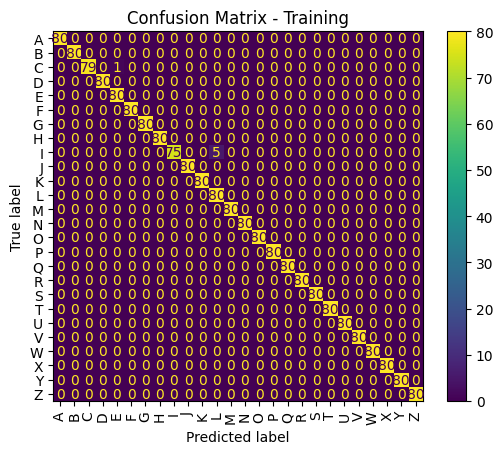

In [42]:
# Visualisasi confusion matrix training
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    display_labels=[chr(i + 64) for i in range(1, 27)],
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix - Training")
plt.show()


In [43]:
# Prediksi pada testing data
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))



              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       0.95      1.00      0.98        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        20
          18       1.00    

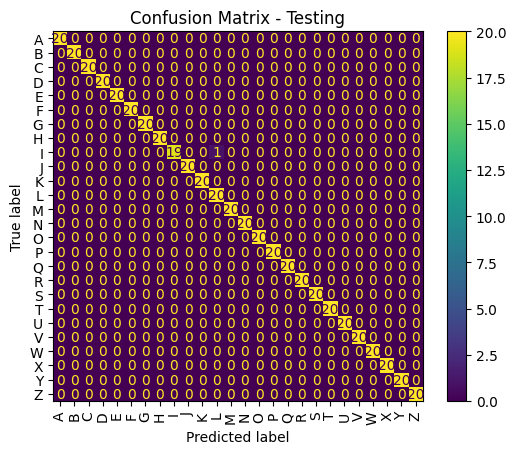

In [44]:
# Visualisasi confusion matrix testing
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    display_labels=[chr(i + 64) for i in range(1, 27)],
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix - Testing")
plt.show()

In [ ]:
loo = LeaveOneOut()
y_true = []
y_pred = []
for train_index, test_index in loo.split(X_hog):
    X_tr, X_te = X_hog[train_index], X_hog[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    model = SVC(C=1, kernel='rbf', gamma='scale')
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)
    y_true.append(y_te[0])
    y_pred.append(pred[0])
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f"LOOCV Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
